In [ ]:
complete case analysis:
we analysing only those observations where the information is present in all the variables 
,no missing value or nan value
>if data more than 5% is missing in a column we don't apply this
>and if data more than 95% is missing  can remove column completely
>missing completely at random(MCAR)
>It also has various disadvantages
>it is not used very frequently

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [22]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [23]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [24]:
df[cols].sample(4)

,city_development_index,enrolled_university,education_level,experience,training_hours
131,0.926,no_enrollment,Graduate,12.0,7.0
4015,0.915,Full time course,High School,2.0,34.0
17394,0.920,no_enrollment,Graduate,16.0,28.0
12877,0.920,Full time course,High School,20.0,188.0


In [25]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [26]:
new_df=df[cols].dropna()
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


<Axes: ylabel='Density'>

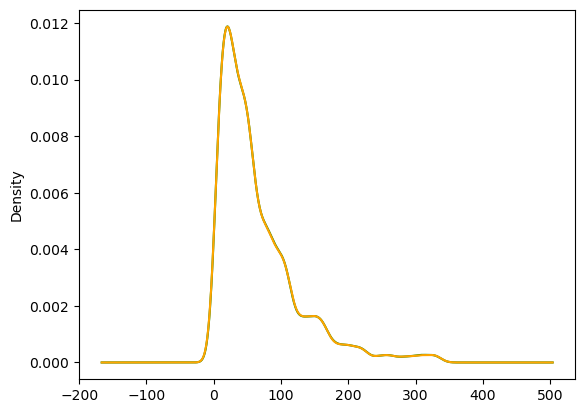

In [38]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].plot.density(color ='green')
new_df['training_hours'].plot.density(color='orange')


In [40]:
# for categorial data
temp=pd.concat([df['education_level'].value_counts()/len(df),
               new_df['education_level'].value_counts()/len(new_df)],
              axis=1)
temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [ ]:
#handling missing numerical data
>univariate imputation

In [ ]:
:mean (when noraml distributation)/median imputation(when skewed)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [47]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [48]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [50]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [54]:
a=x_train['Age'].mean()
a1=x_train['Age'].median()
b=x_train['Fare'].mean()
b1=x_train['Fare'].median()

In [60]:
x_train['age_mean']=x_train['Age'].fillna(a)
x_train['age_median']=x_train['Age'].fillna(a1)
x_train['fare_mean']=x_train['Fare'].fillna(b)
x_train['fare_median']=x_train['Fare'].fillna(b1)


In [61]:
x_train.sample(4)

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
570,62.0,10.5000,0,62.000000,62.00,10.5000,10.5000
366,60.0,75.2500,1,60.000000,60.00,75.2500,75.2500
364,NaN,15.5000,1,29.785904,28.75,15.5000,15.5000
640,20.0,7.8542,0,20.000000,20.00,7.8542,7.8542


In [62]:
print('age variance before',x_train['Age'].var())
print(' age variance after',x_train['age_mean'].var())
print('variance before',x_train['Fare'].var())
print('variance after',x_train['fare_mean'].var())

age variance before 204.3495133904614
 age variance after 161.81262452718673
variance before 2448.197913706318
variance after 2324.2385256705547


In [ ]:
## check using graph plot .box plot 
#we can also use sk learn

In [ ]:
# arbitary value imputation
used mostly in catrgorial dataalso used for numerial fill it with an arbitary number

In [ ]:
#handling data at categorial data
we mostly use mode in this